# Optical Digits Classification Task

# ------------------------------------------------------
# Step 1: Import required libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
%matplotlib inline

# Step 2: Load the training and testing datasets

In [ ]:
# Each file contains rows of 64 pixel values (representing 8x8 images)
# followed by the class label (digit 0–9).
train_data = np.loadtxt('optdigits.tra', delimiter=',')
test_data = np.loadtxt('optdigits.tes', delimiter=',')

# Separate features (X) and labels (y)
X_train = train_data[:, :-1]
y_train = train_data[:, -1].astype(int)
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (3823, 64)
Testing data shape: (1797, 64)


# Step 3: Visualize a sample digit

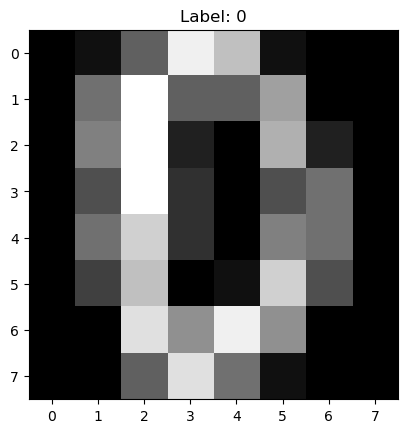

In [3]:
# display one sample from the training data to confirm it looks correct.

plt.imshow(X_train[0].reshape(8, 8), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


# Step 4: Train a baseline Random Forest Classifier

In [4]:
# The training set is used to teach the model patterns between the input pixels and labels.
# The testing set will later evaluate how well the model generalizes to unseen data.

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Step 5: Parameter tuning
 tune the parameter `n_estimators`, which specifies how many trees to build.
 increasing the number of trees generally improves accuracy and reduces variance.
select 200 trees to balance performance and computational efficiency.

In [5]:

clf_tuned = RandomForestClassifier(n_estimators=200, random_state=42)
clf_tuned.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#  Step 6: Evaluate the model

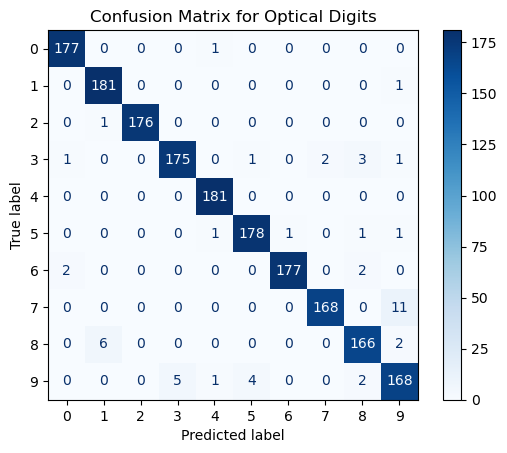

In [6]:
# test the model on unseen data and visualize the confusion matrix.

y_pred = clf_tuned.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Optical Digits")
plt.show()


#  Step 7: Performance metrics

In [7]:
# evaluate accuracy, precision, recall, and F1-score to understand how well the model performs.
# Using average='macro' ensures each class is weighted equally.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")


Accuracy: 0.9722
Precision (macro): 0.9724
Recall (macro): 0.9721
F1-score (macro): 0.9722


Model Performance Summary

The model shows good overall performance on the Optdigits dataset. It achieved an accuracy of 97.22%, indicating that it correctly classified the vast majority of handwritten digit samples.

The macro-averaged precision (97.24%), recall (97.21%), and F1-score (97.22%) show that the model performs consistently well across all digit classes, with no significant imbalance in its ability to identify different digits.

These metrics collectively suggest that the classifier is both highly accurate and generalizable, maintaining a strong balance between correctly identifying digits (high recall) and minimizing false positives (high precision). The close alignment of all three metrics reinforces that the model’s predictions are both reliable and stable across the full dataset.

# Step 8: Identify the most misclassified class

In [8]:
# calculate which class had the most errors (off-diagonal confusion matrix counts).

misclass_counts = cm.sum(axis=1) - np.diag(cm)
worst_class = np.argmax(misclass_counts)
print(f"Class with the highest misclassifications: {worst_class}")

Class with the highest misclassifications: 9


# ------------------------------------------------------
#  Summary
# ------------------------------------------------------
# The model achieves high accuracy on the Optical Digits dataset.
# Any remaining misclassifications could be improved by tuning more hyperparameters,
# such as max_depth, max_features, or min_samples_split